In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(arrow)
library(umap)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘arrow’ was built under R version 4.2.3”

Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp


Warning message:
“package ‘umap’ was built under R version 4.2.3”


In [2]:
# set path to the data
file_path <- file.path("..","..","data", "5.converted_data","normalized_feature_selected_output.parquet")

# read the data
df <- arrow::read_parquet(file_path)
head(df)

Metadata_ImageNumber,Metadata_Image_FileName_OP,Metadata_ObjectNumber,Metadata_ConvertImageToObjects_Number_Object_Number,Metadata_ConvertImageToObjects_AreaShape_BoundingBoxArea,Metadata_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_X,Metadata_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_Y,Metadata_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_X,Metadata_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_Y,Metadata_ConvertImageToObjects_Location_CenterMassIntensity_X_OP,⋯,Texture_SumEntropy_OP_3_02_256,Texture_SumEntropy_OP_3_03_256,Texture_SumVariance_OP_3_00_256,Texture_SumVariance_OP_3_01_256,Texture_SumVariance_OP_3_02_256,Texture_SumVariance_OP_3_03_256,Texture_Variance_OP_3_00_256,Texture_Variance_OP_3_01_256,Texture_Variance_OP_3_02_256,Texture_Variance_OP_3_03_256
<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MAX_high_10_L.tiff,1,1,38250,269,182,44,12,131.5461,⋯,0.8414748,0.8345736,1.14918564,1.1522001,1.07890507,1.14484796,1.04000878,1.02573996,1.04549223,1.02761705
2,MAX_high_10_R.tiff,1,1,34170,208,245,38,44,106.9621,⋯,0.4524796,0.4361385,0.11217819,0.1319819,0.10860250,0.12569959,0.07571690,0.07120688,0.07647711,0.06792193
3,MAX_high_11_L.tiff,1,1,41736,250,267,62,45,131.3598,⋯,0.4948130,0.4908441,-0.01613966,0.0010415,-0.02199706,-0.02099207,-0.03393425,-0.04263493,-0.03498345,-0.03876252
4,MAX_high_11_R.tiff,1,1,43616,212,272,24,40,101.0699,⋯,0.8787288,0.8656168,1.12090459,1.1406044,1.07452904,1.11794134,1.03158516,1.01517198,1.03514983,1.01918842
5,MAX_high_12_L.tiff,2,2,25894,283,155,69,34,164.5791,⋯,0.4767676,0.4826737,0.17788587,0.1479330,0.10331342,0.15645695,0.11176513,0.10784585,0.11761376,0.10885888
6,MAX_high_12_R.tiff,1,1,40920,229,265,43,45,119.3891,⋯,0.1422418,0.1351928,-0.28744321,-0.2676854,-0.30011318,-0.29231741,-0.31932910,-0.32658057,-0.31978483,-0.32240245


In [3]:
# split the data into metadata and features
metadata_df <- df %>% select(contains("Metadata"))
features_df <- df %>% select(-contains("Metadata"))
print(dim(metadata_df))
print(dim(features_df))

[1] 136  24
[1] 136 244


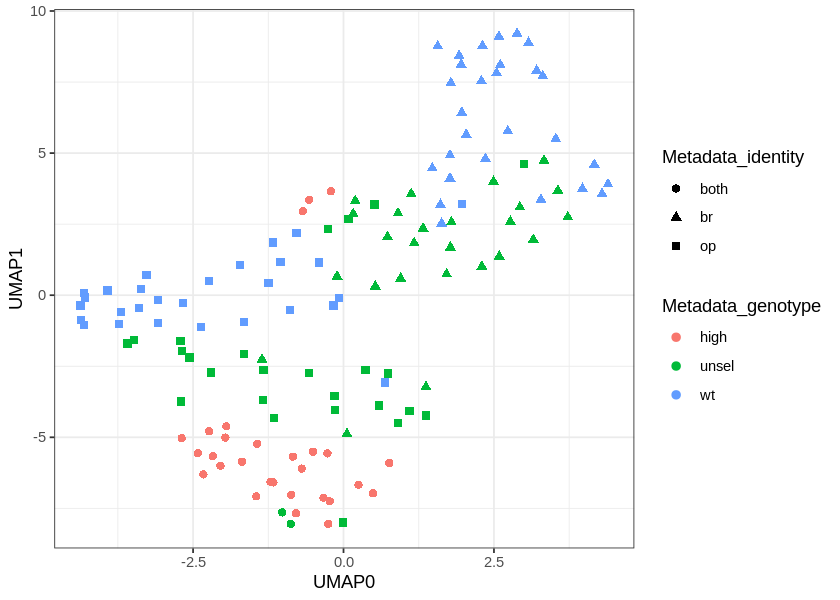

In [9]:
# umap
width <- 7
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_df <- umap::umap((features_df), n_neighbors = 7, min_dist = 0.7, n_components = 2, metric = "cosine")
umap_df <- as.data.frame(umap_df$layout)
colnames(umap_df) <- c("UMAP0", "UMAP1")
umap_df <- cbind(metadata_df, umap_df)

# plot umap
umap_plot <- (
    ggplot(umap_df, aes(x = UMAP0, y = UMAP1, color = Metadata_genotype, shape = Metadata_identity))
    + geom_point(size = 2)
    + theme_bw()
)
umap_plot


Warning message:
“package ‘factoextra’ was built under R version 4.2.3”
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



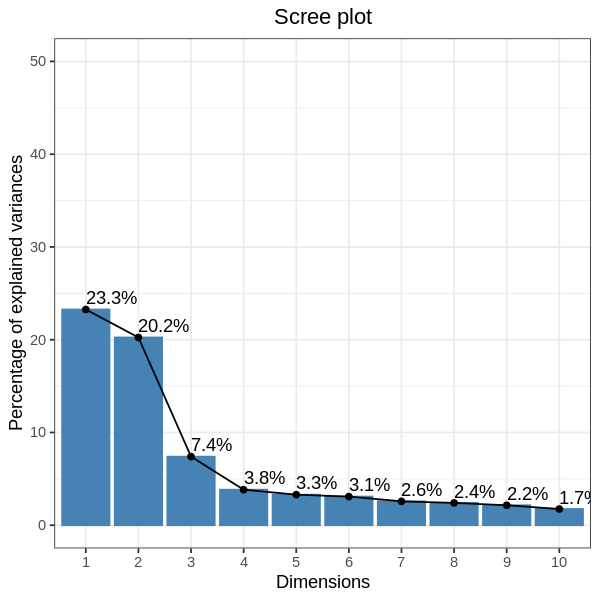

In [5]:
# Load necessary packages
library(factoextra)

# Apply PCA
res.pca <- prcomp(features_df, scale = TRUE)

# Create scree plot
scree_plot <- fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))
scree_plot <- (
    scree_plot
    + theme_bw()
    # title centered
    + theme(plot.title = element_text(hjust = 0.5))
)
scree_plot

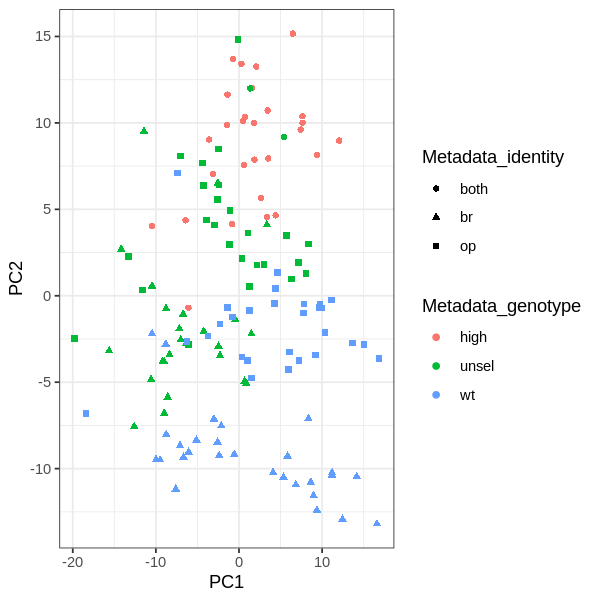

In [6]:
# pca analysis
pca_df <- as.data.frame(res.pca$x)
pca_df <- cbind(metadata_df, pca_df)

# plot pca
pca_plot <- (
    ggplot(pca_df, aes(x = PC1, y = PC2, color = Metadata_genotype, shape = Metadata_identity))
    + geom_point()
    + theme_bw()
)
pca_plot


In [7]:
# split the data by genotype
unique(df$Metadata_genotype)
# remove metadata columns
tmp_df <- df %>% select(-contains("Metadata"))
tmp_df$Metadata_genotype <- df$Metadata_genotype
tmp_df$Metadata_identity <- df$Metadata_identity

agg_df <- tmp_df %>% group_by(Metadata_identity, Metadata_genotype) %>% summarize_all(c("mean", "sd"))
# remove grouping
agg_df <- agg_df %>% ungroup()
agg_df


[1] "high"  "unsel" "wt"

Metadata_identity,Metadata_genotype,AreaShape_Area_mean,AreaShape_CentralMoment_0_0_mean,AreaShape_CentralMoment_0_1_mean,AreaShape_CentralMoment_0_2_mean,AreaShape_CentralMoment_0_3_mean,AreaShape_CentralMoment_1_0_mean,AreaShape_CentralMoment_1_1_mean,AreaShape_CentralMoment_1_2_mean,⋯,Texture_SumEntropy_OP_3_02_256_sd,Texture_SumEntropy_OP_3_03_256_sd,Texture_SumVariance_OP_3_00_256_sd,Texture_SumVariance_OP_3_01_256_sd,Texture_SumVariance_OP_3_02_256_sd,Texture_SumVariance_OP_3_03_256_sd,Texture_Variance_OP_3_00_256_sd,Texture_Variance_OP_3_01_256_sd,Texture_Variance_OP_3_02_256_sd,Texture_Variance_OP_3_03_256_sd
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
both,high,1.4362386,1.4362386,-0.061213091,1.1316994,-0.131652375,-0.039943508,-1.00880048,0.26756298,⋯,0.6117827,0.6086640,0.8454123,0.8480665,0.8216767,0.8392149,0.8053299,0.7987709,0.8082156,0.7997198
both,unsel,1.8982559,1.8982559,-2.841773705,2.6356720,3.589966147,-0.577878278,-2.17763178,-4.37742627,⋯,0.2800059,0.2943854,0.6191658,0.6292972,0.6109477,0.6298066,0.5923179,0.5883276,0.5886807,0.5932903
br,unsel,-0.6494553,-0.6494553,0.023679158,-0.5489685,0.020013176,-0.141039635,0.13209684,-0.05321917,⋯,0.8111755,0.8016307,0.3466328,0.3609175,0.3444232,0.3296973,0.3425150,0.3439972,0.3459618,0.3437349
br,wt,-0.8591976,-0.8591976,0.047023482,-0.6858980,-0.001567181,0.087914618,0.01373204,-0.14026013,⋯,1.1299260,1.1355912,1.0484553,0.9168572,1.1088977,1.1276552,1.1559083,1.1831724,1.1512681,1.1432411
op,unsel,0.1872720,0.1872720,-0.008125513,0.2132491,0.036803320,0.123839262,0.31290571,0.31464605,⋯,1.0212556,1.0386846,0.8803851,0.8891408,0.8463899,0.8616907,0.8344051,0.8312373,0.8383868,0.8365028
op,wt,-0.2999670,-0.2999670,0.203286262,-0.3343143,-0.173935612,0.008663385,0.75328986,-0.04804641,⋯,0.9532833,0.9492253,1.2403516,1.2959517,1.2477156,1.2143657,1.2262186,1.2122997,1.2246209,1.2349764
